# ME 454 Homework 3
## By: Christopher Tsai

In [308]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy import optimize

Problem 1, Part a:

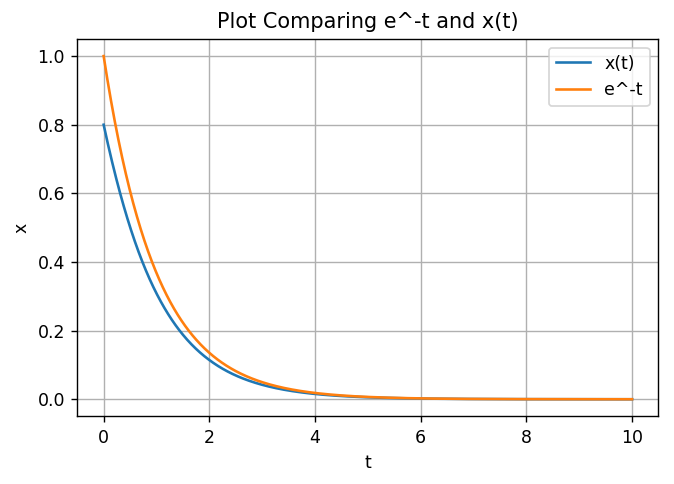

A good initial choice for x0 seems to be x0 = 1, as around this point the curves have very little difference.


In [309]:
def ode(t, x):
    xdot = -np.sin(x)
    return xdot

N = 1000
T = 10
dt = T/(N-1)

sol = integrate.solve_ivp(ode, [0,T], [0.8], t_eval=np.linspace(0,T,N))    

x = sol.y[0]
t = [i*dt for i in range(N)]
exp_neg_t = [math.exp(-i*dt) for i in range(N)]

plt.figure(dpi=125, facecolor='w')
plt.plot(t, x, label='x(t)')
plt.plot(t, exp_neg_t, label='e^-t')
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.title("Plot Comparing e^-t and x(t)")
plt.legend()
plt.show()

print("A good initial choice for x0 seems to be x0 = 1, as around this point the curves have very little difference.")

Problem 1, Part b:

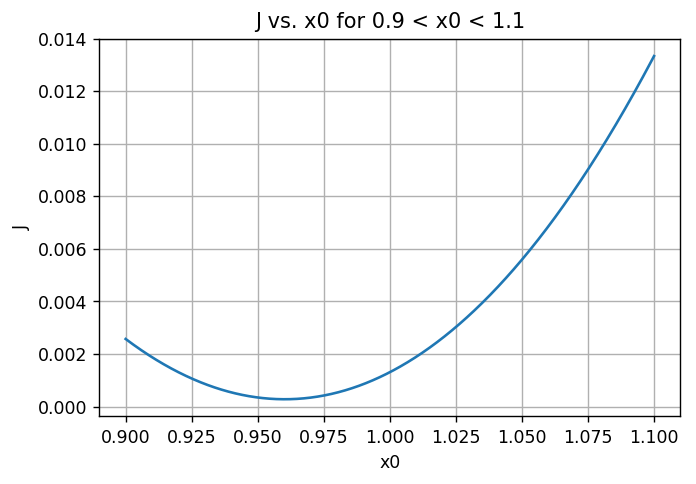

Minimum should be around x0 = 0.970.


In [310]:
x0 = [0.9 + (i*0.2/(N-1)) for i in range(N)]

J = []
exp_neg_t = [math.exp(-i*dt) for i in range(N)]

for x0_element in x0:
    sol = integrate.solve_ivp(ode, [0,T], [x0_element], t_eval=np.linspace(0,T,N))    
    x = sol.y[0]
    J_element = 0
    for j in range(N):
        J_element += ((exp_neg_t[j] - x[j])**2)*dt
    J.append(J_element)
    
plt.figure(dpi=125, facecolor='w')
plt.plot(x0, J)
plt.xlabel('x0')
plt.ylabel('J')
plt.grid(True)
plt.title("J vs. x0 for 0.9 < x0 < 1.1")
plt.show()

print("Minimum should be around x0 = 0.970.")

Problem 1, Part c:

![](hw3_q1.jpg)

In [311]:
def ode(t, r):
    x, phi = r
    xdot = -np.sin(x)
    phidot = -np.cos(x)*phi
    return xdot, phidot

sol = integrate.solve_ivp(ode, [0,T], [1,1], t_eval=np.linspace(0,T,N))  
x = sol.y[0]
phi = sol.y[1]

grad_J = 0

for i in range(N):
    grad_J += 2*(-math.exp(-2*t[i]) + x[i]*math.exp(-t[i]) + math.sin(x[i])*math.exp(-t[i]) - x[i]*math.sin(x[i]))*phi[i]*dt
    
print("grad_J =", grad_J, "(at x0 = 1)")

grad_J = 0.0005902013645481816 (at x0 = 1)


Problem 1, Part d:

In [312]:
grad_J = 1
x0 = 1

while(abs(grad_J) > 10e-6):
    sol = integrate.solve_ivp(ode, [0,T], [x0,1], t_eval=np.linspace(0,T,N))  
    x = sol.y[0]
    phi = sol.y[1]

    grad_J = 0
    for i in range(N):
        grad_J += 2*(-math.exp(-2*t[i]) + x[i]*math.exp(-t[i]) + math.sin(x[i])*math.exp(-t[i]) - x[i]*math.sin(x[i]))*phi[i]*dt
    
    x0 -= abs(grad_J)

print("Optimal value is x0 =", x0)

Optimal value is x0 = 0.9843013929586273


Problem 2, Part a:

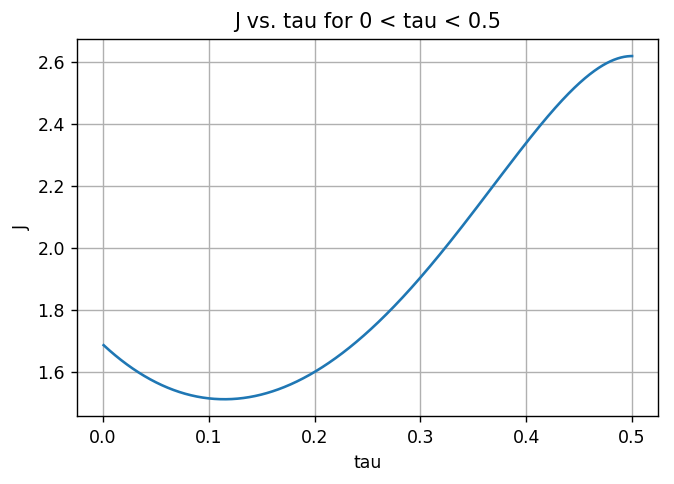

In [313]:
def f1(t, r):
    x, y = r
    xdot = -x
    ydot = x + 2*y
    return xdot, ydot

def f2(t, r):
    x, y = r
    xdot = x + y
    ydot = x - 2*y
    return xdot, ydot  

T = 0.5
dt = T/(N-1)

t = [i*dt for i in range(N)]
J = []
tau = [(i*0.5/(N-1)) for i in range(N)]

for tau_element in tau:
    J_element = 0
    if tau_element != 0:
        sol1 = integrate.solve_ivp(f1, (0,tau_element), [1,1], t_eval=np.linspace(0,tau_element,N))
        x1 = sol1.y[0]
        y1 = sol1.y[1]
    if tau_element != T:
        sol2 = integrate.solve_ivp(f2, (tau_element,T), [x1[-1],y1[-1]], t_eval=np.linspace(tau_element,T,N))  
        x2 = sol2.y[0]
        y2 = sol2.y[1]
    if tau_element != 0:
        for i in range(len(x1)):
            J_element += (x1[i]**2 + y1[i]**2)*(tau_element/(len(x1)-1))
    if tau_element != T:
        for i in range(len(x2)):
            J_element += (x2[i]**2 + y2[i]**2)*((T-tau_element)/(len(x2)-1))
    J.append(J_element)

plt.figure(dpi=125, facecolor='w')
plt.plot(tau[1:], J[1:])
plt.xlabel('tau')
plt.ylabel('J')
plt.grid(True)
plt.title("J vs. tau for 0 < tau < 0.5")
plt.show()

Problem 2, Parts b & c:

In [316]:
def dJ_dtau(tau):
    def rho_ode_1(t, r):
        x, y, rhox, rhoy = r
        A = np.array([[-1, 0], [1, 2]])
        dl_dx = np.array([[2*x], [2*y]])
        xdot = np.matmul(A, np.array([[x], [y]]))[0][0]
        ydot = np.matmul(A, np.array([[x], [y]]))[1][0]
        rhoxdot = (np.matmul(-A.T, np.array([[rhox], [rhoy]])) - dl_dx)[0][0]
        rhoydot = (np.matmul(-A.T, np.array([[rhox], [rhoy]])) - dl_dx)[1][0]
        return xdot, ydot, rhoxdot, rhoydot

    def rho_ode_2(t, r):
        x, y, rhox, rhoy = r
        A = np.array([[1, 1], [1, -2]])
        dl_dx = np.array([[2*x], [2*y]])
        xdot = np.matmul(A, np.array([[x], [y]]))[0][0]
        ydot = np.matmul(A, np.array([[x], [y]]))[1][0]
        rhoxdot = (np.matmul(-A.T, np.array([[rhox], [rhoy]])) - dl_dx)[0][0]
        rhoydot = (np.matmul(-A.T, np.array([[rhox], [rhoy]])) - dl_dx)[1][0]
        return xdot, ydot, rhoxdot, rhoydot

    sol1 = integrate.solve_ivp(rho_ode_1, [0,tau], [1,1,0,0], t_eval=np.linspace(0,tau,N)) 
    x1 = sol1.y[0]
    y1 = sol1.y[1]
    rhox1 = sol1.y[2]
    rhoy1 = sol1.y[3]
    
    sol2 = integrate.solve_ivp(rho_ode_2, [tau,T], [x1[-1],y1[-1],rhox1[-1],rhoy1[-1]], t_eval=np.linspace(tau,T,N))  
    x2 = sol2.y[0]
    y2 = sol2.y[1]
    rhox2 = sol2.y[2]
    rhoy2 = sol2.y[3]
    
    A1 = np.array([[-1, 0], [1, 2]])
    A2 = np.array([[1, 1], [1, -2]])
    
#     tau = int(tau/T*N)  # convert to index
    
    dJ_dtau = np.matmul(np.array([[rhox1[-1]], [rhoy1[-1]]]).T, np.matmul(A1, np.array([[x1[-1]], [y1[-1]]]) - np.matmul(A2, np.array([[x2[0]], [y2[0]]]))))
    
    return dJ_dtau[0][0]

dJ_dtau(0.25)

-5.552993581439528

In [ ]:
Xi = X.subs({x11: 1, x12: 1, x21: 1, x22: 1})    # initial guess
fi = f.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})
Dfi = Df.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})  
Zi = Z.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})  

alpha = 0.4
beta = 0.7
epsilon = 10e-6

i = 0
f_list = []
f_list.append(fi)

while Dfi.norm() > epsilon:
    n = 0
    gamma = beta**n

    while (f.subs({x11: Xi[0,0] + gamma*Zi[0,0], x12:Xi[0,1] + gamma*Zi[0,1], x21:Xi[1,0] + gamma*Zi[1,0], 
                  x22:Xi[1,1] + gamma*Zi[1,1]}))[0] > (fi + sym.Matrix([alpha*gamma*(Dfi[0,0]*Zi[0,0] + Dfi[0,1]*Zi[0,1] \
                  + Dfi[1,0]*Zi[1,0] + Dfi[1,1]*Zi[1,1])]))[0]:
            n += 1
            gamma = beta**n
            
    Xi += gamma*Zi
    
    fi = f.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})
    Dfi = Df.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})  
    Zi = Z.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})  
    
    f_list.append(fi)
    i += 1

print("Minimizer is: Xi = ")
display(Xi)

plt.figure(dpi=125, facecolor='w')
plt.plot([j for j in range(len(f_list))], [f_list[k][0] for k in range(len(f_list))])
plt.xlabel('iteration')
plt.ylabel('f(X)')
plt.grid(True)
plt.title("Plot of f(X) for every iteration")
plt.show()